<a href="https://colab.research.google.com/github/danielhli/BaseballPredictor/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

kboData = pd.read_csv('kbopitchingdata.csv')
print(kboData.shape)
print(kboData.head())

(319, 15)
   id  runs_per_game  wins  losses  winning_losing  win_loss_percentage  \
0   1           3.90    72      57               1                0.558   
1   2           4.06    75      59               1                0.560   
2   3           4.57    70      65               1                0.519   
3   4           4.57    75      59               1                0.560   
4   6           4.89    69      67               1                0.507   

   games  shutouts  hits  runs  home_runs  walks  strikeouts  batters_faced  \
0    143        18  1117   557         79    542        1062           5416   
1    143         6  1166   581         85    486        1051           5359   
2    143        10  1288   653        104    586        1037           5596   
3    143        14  1287   653        129    526        1031           5496   
4    143         7  1276   699        100    566         893           5568   

    WHIP  
0  1.312  
1  1.316  
2  1.487  
3  1.450  
4  1.469 

In [ ]:
# ## 3. Data Preparation

# In[3]:


# Divide data into predictor features vector and the label of the trget variable 'Risk'

kboData = pd.read_csv('kbopitchingdata.csv')
kboData = kboData.drop(['win_loss_percentage', 'id', 'wins', 'losses', 'games'], axis=1)
X = kboData.drop(['winning_losing'], axis=1)
y = kboData['winning_losing']

In [ ]:
kboData.corr().style.background_gradient(cmap='coolwarm')

,runs_per_game,winning_losing,shutouts,hits,runs,home_runs,walks,strikeouts,batters_faced,WHIP
runs_per_game,1.000000,-0.503735,-0.359760,0.753751,0.906234,0.768167,0.579817,0.381559,0.570106,0.921574
winning_losing,-0.503735,1.000000,0.258000,-0.243317,-0.377101,-0.233014,-0.237514,0.065480,-0.120543,-0.477675
shutouts,-0.359760,0.258000,1.000000,-0.045784,-0.198215,-0.238954,-0.036804,0.177731,0.089479,-0.300417
hits,0.753751,-0.243317,-0.045784,1.000000,0.938442,0.785602,0.649118,0.758071,0.931796,0.731588
runs,0.906234,-0.377101,-0.198215,0.938442,1.000000,0.858699,0.721846,0.678523,0.854299,0.840976
home_runs,0.768167,-0.233014,-0.238954,0.785602,0.858699,1.000000,0.514362,0.652893,0.716449,0.629627
walks,0.579817,-0.237514,-0.036804,0.649118,0.721846,0.514362,1.000000,0.576185,0.749909,0.709974
strikeouts,0.381559,0.065480,0.177731,0.758071,0.678523,0.652893,0.576185,1.000000,0.872645,0.320395
batters_faced,0.570106,-0.120543,0.089479,0.931796,0.854299,0.716449,0.749909,0.872645,1.000000,0.558895
WHIP,0.921574,-0.477675,-0.300417,0.731588,0.840976,0.629627,0.709974,0.320395,0.558895,1.000000


In [ ]:
X = X.drop(['strikeouts'], axis =1)

In [ ]:
# Dividing data into two subsets :train and test set.Training set trains the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# Data normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ## 4. Train Data and 5. Testing the data using Decision Tree  6. Evaluate

# In[4]:


# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

from sklearn.tree import DecisionTreeClassifier

# Creating an instance of the Decision Tree
clf = DecisionTreeClassifier(random_state=42)
# Fiting the training data to the model
clf.fit(X_train, y_train)
# Printing the training accuracy with 3 significant figure accuracy
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
# Printing the testing accuracy with 3 significant figure accuracy
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.656


In [ ]:
# In[5]:


from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)

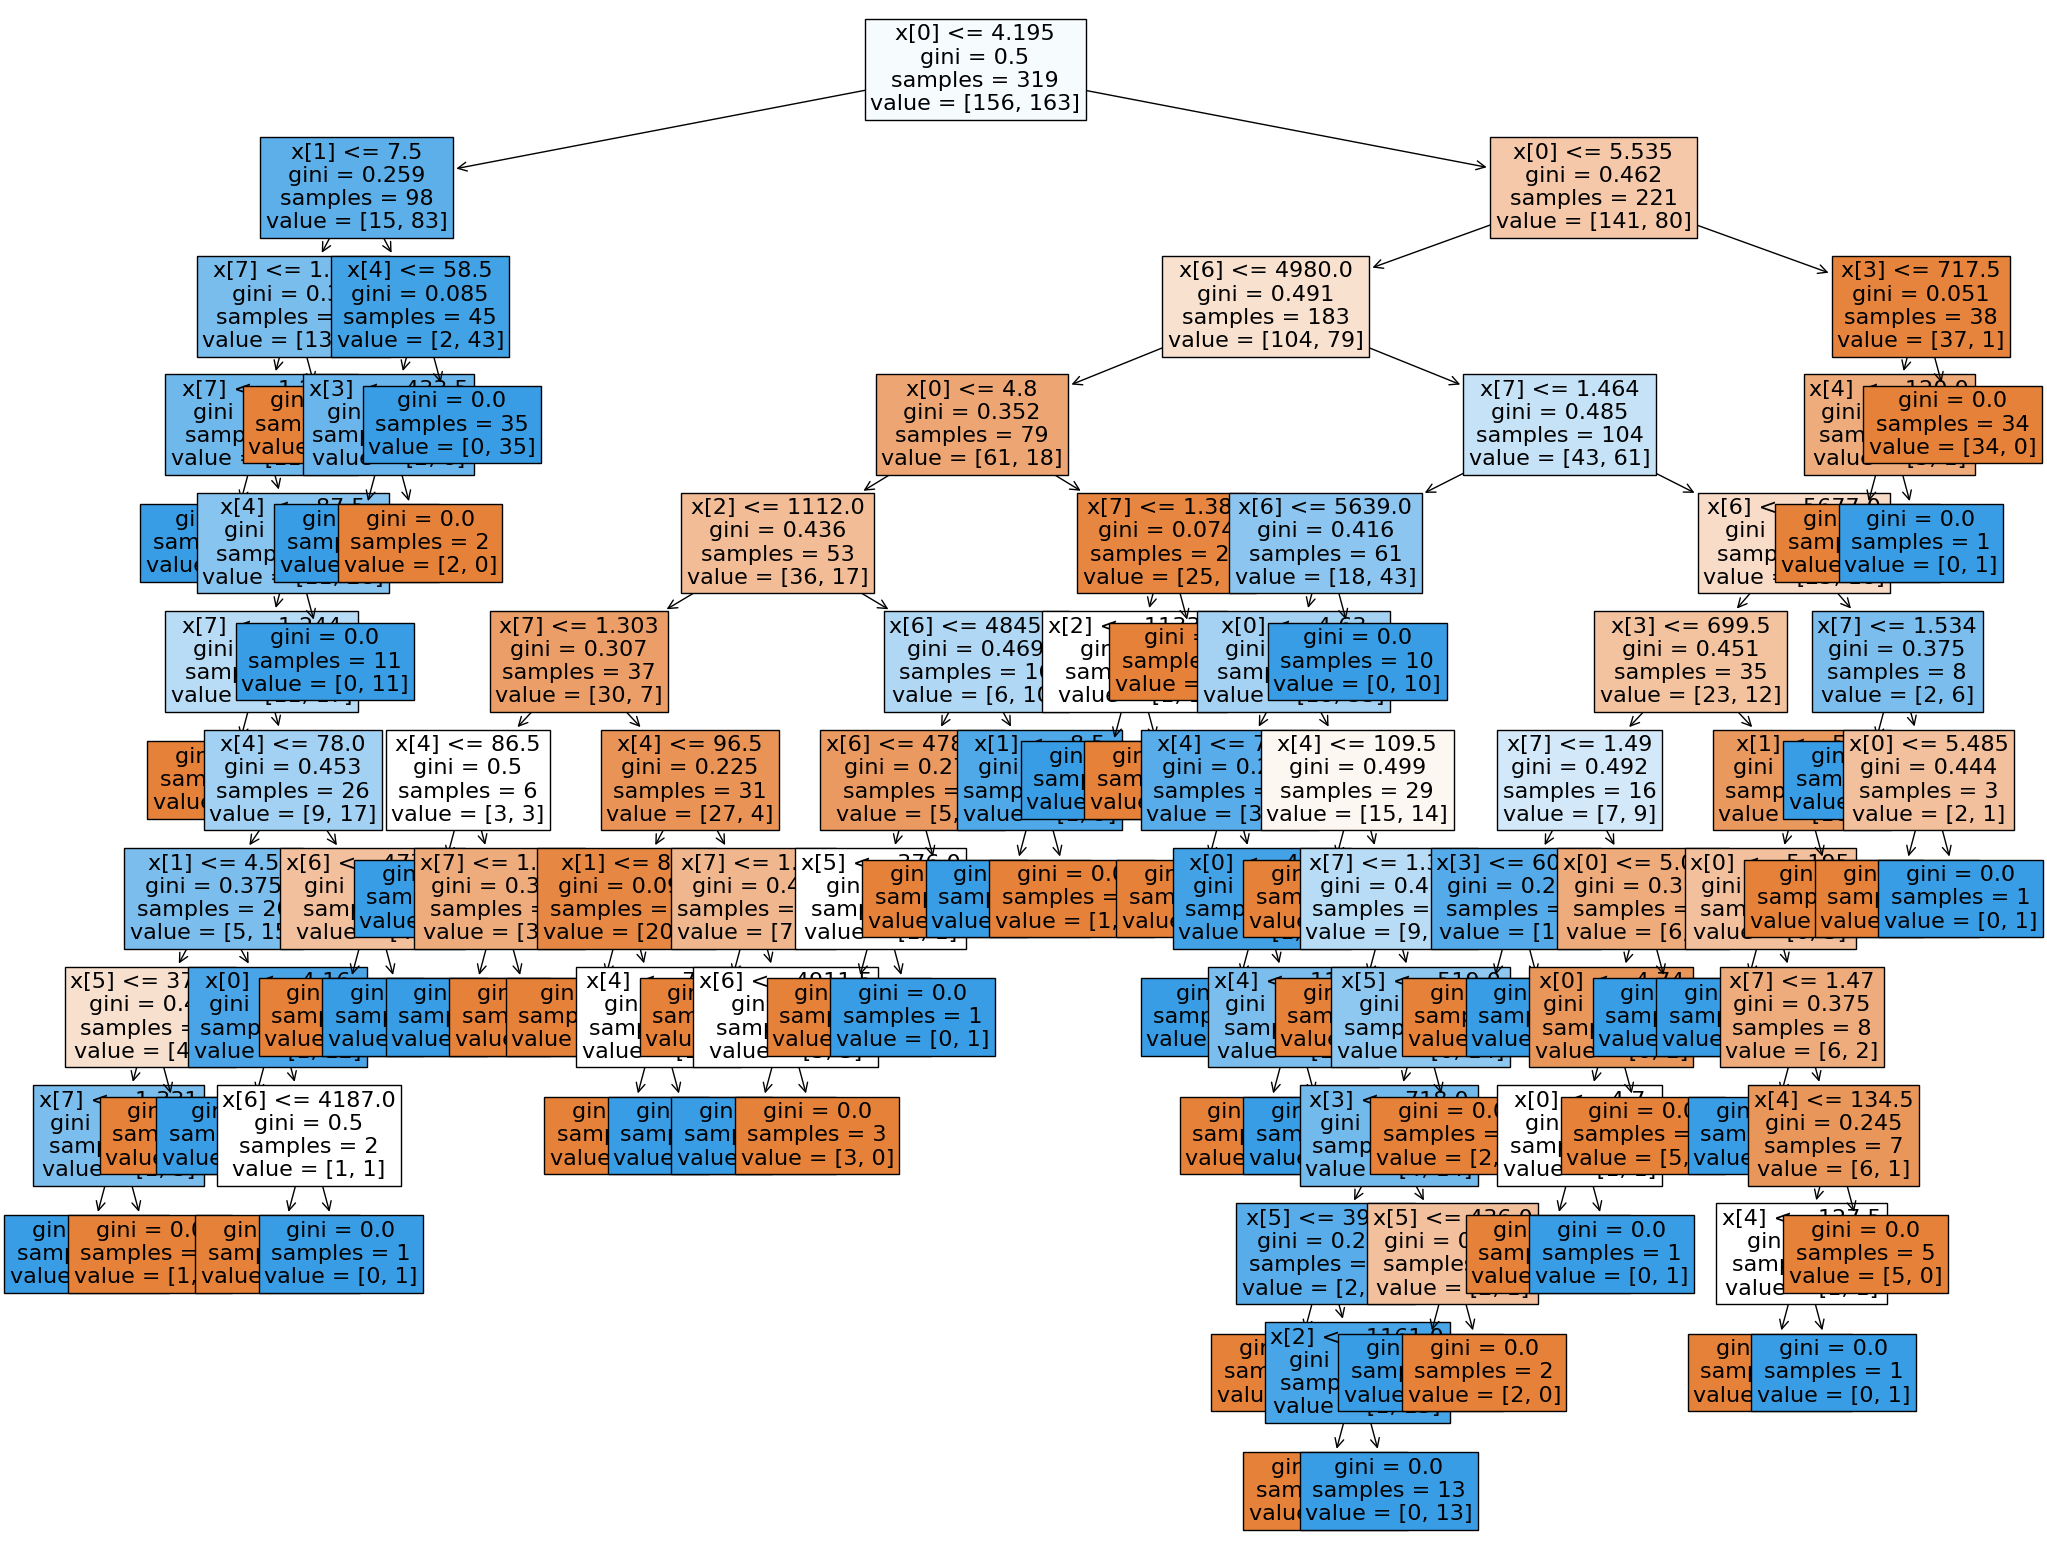

In [ ]:
# In[6]:
from sklearn import tree


fig = plt.figure(figsize=(25,20))
features = ['runs_per_game', 'shutouts', 'hits', 'runs', 'home_runs', 'walks', 'strikeouts', 'WHIP']
y1 =['winning_losing']
tree.plot_tree(clf, filled = True, fontsize = 16)
fig.savefig("C:\\check\\decistion_tree.png")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,
                  20,
                  30,
                  40,
                  50,
                  60,
                  70,
                  80,
                  90,
                  100,
                  110,
                  120,
                  130,
                  140,
                  150,
                  160,
                  170,
                  180,
                  190,
                  200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 3,
 'bootstrap': True}

Text(0, 0.5, 'Testing Accuracy')

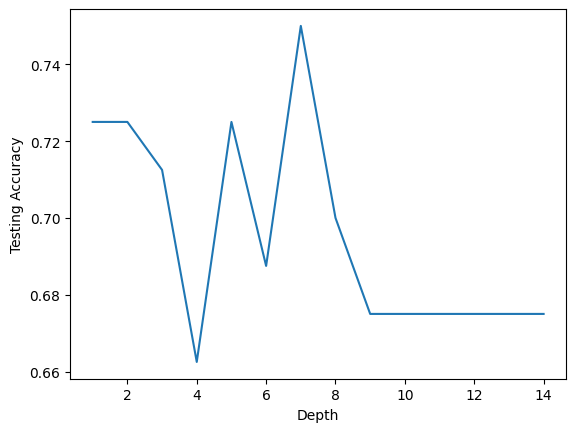

In [ ]:
from sklearn import metrics
scores = []

for x in range(1,15):
  tree = DecisionTreeClassifier(max_depth=x, random_state=0)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,15), scores)
plt.xlabel('Depth')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

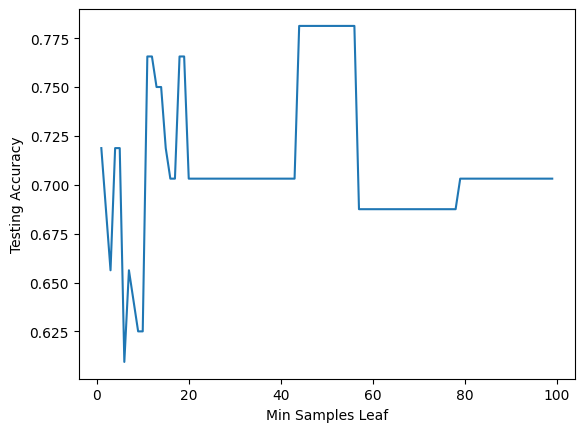

In [ ]:
from sklearn import metrics
scores = []

for x in range(1,100):
  tree = DecisionTreeClassifier(min_samples_leaf=x, random_state=0)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(1,100), scores)
plt.xlabel('Min Samples Leaf')
plt.ylabel('Testing Accuracy')

Text(0, 0.5, 'Testing Accuracy')

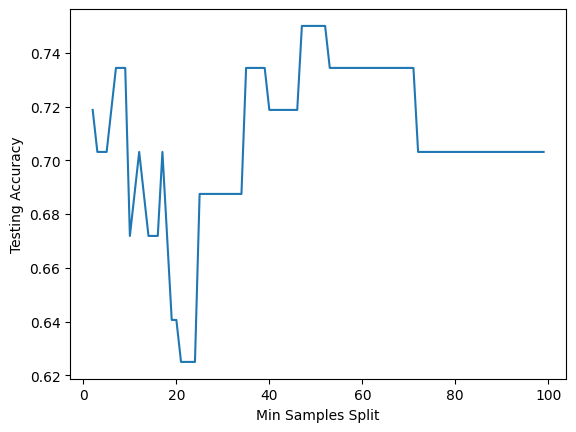

In [ ]:
from sklearn import metrics
scores = []

for x in range(2,100):
  tree = DecisionTreeClassifier(min_samples_split=x, random_state=0)
  tree.fit(X_train, y_train)
  y_pred = tree.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, y_pred))

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(2,100), scores)
plt.xlabel('Min Samples Split')
plt.ylabel('Testing Accuracy')

In [ ]:
# In[8]:


# Improving the Decision Tree accuracy
tree = DecisionTreeClassifier(max_depth=10, min_samples_leaf = 50, min_samples_split = 46, random_state=42)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.778
Accuracy on test set: 0.750


In [ ]:
# In[9]:


print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.63501929 0.         0.         0.         0.         0.
 0.17155718 0.19342353]


8


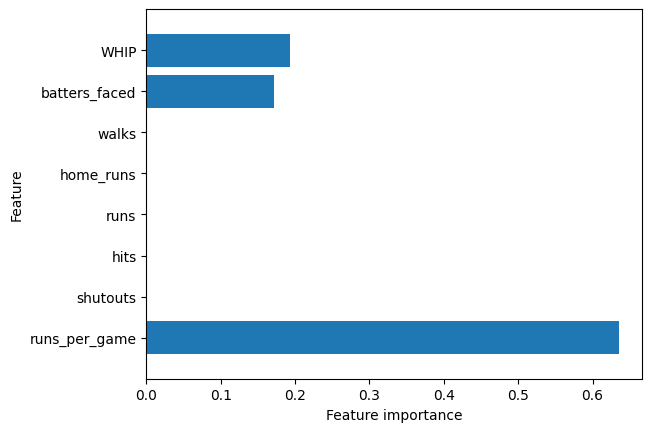

In [ ]:
# ## 7. Feature Importance and techniques to improve performance

# In[10]:


# Creating a function to generate feature importance and plot it.

def plot_feature_importances_dataMoods(model):
# extractibg the number of predictive feature variables(columns)
    n_features = X.shape[1]
    print(n_features)
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

# Calling the function to extract feature importance and passing the model named tree (constructed earlier) into it.

plot_feature_importances_dataMoods(tree)

Accuracy on training set: 0.812
Accuracy on test set: 0.775
8


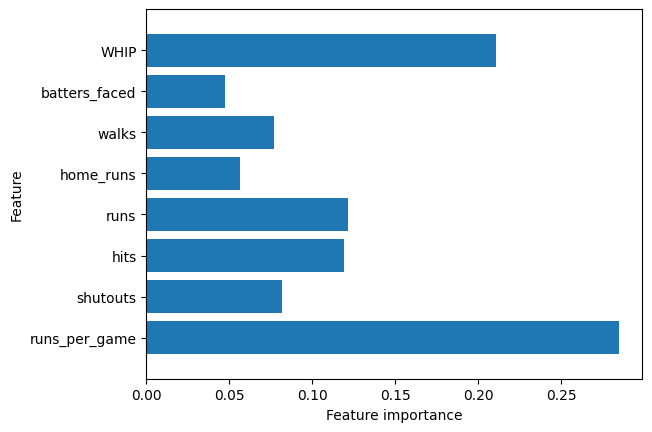

In [ ]:
# ## 8. Random Forest

# In[11]:


# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)
forest = RandomForestClassifier(max_depth=3,n_estimators=100, min_samples_split = 10, min_samples_leaf = 1, max_features = 'auto', random_state=42)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

plot_feature_importances_dataMoods(forest)

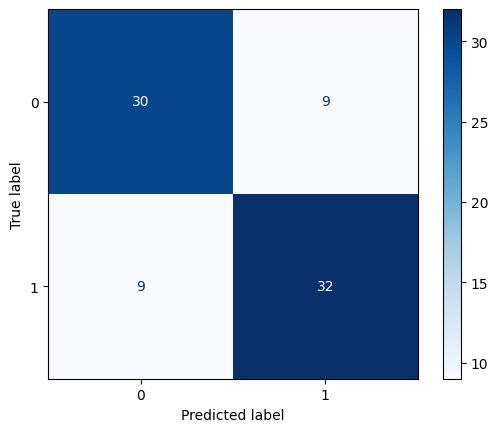

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred = forest.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap=plt.cm.Blues,values_format='g')

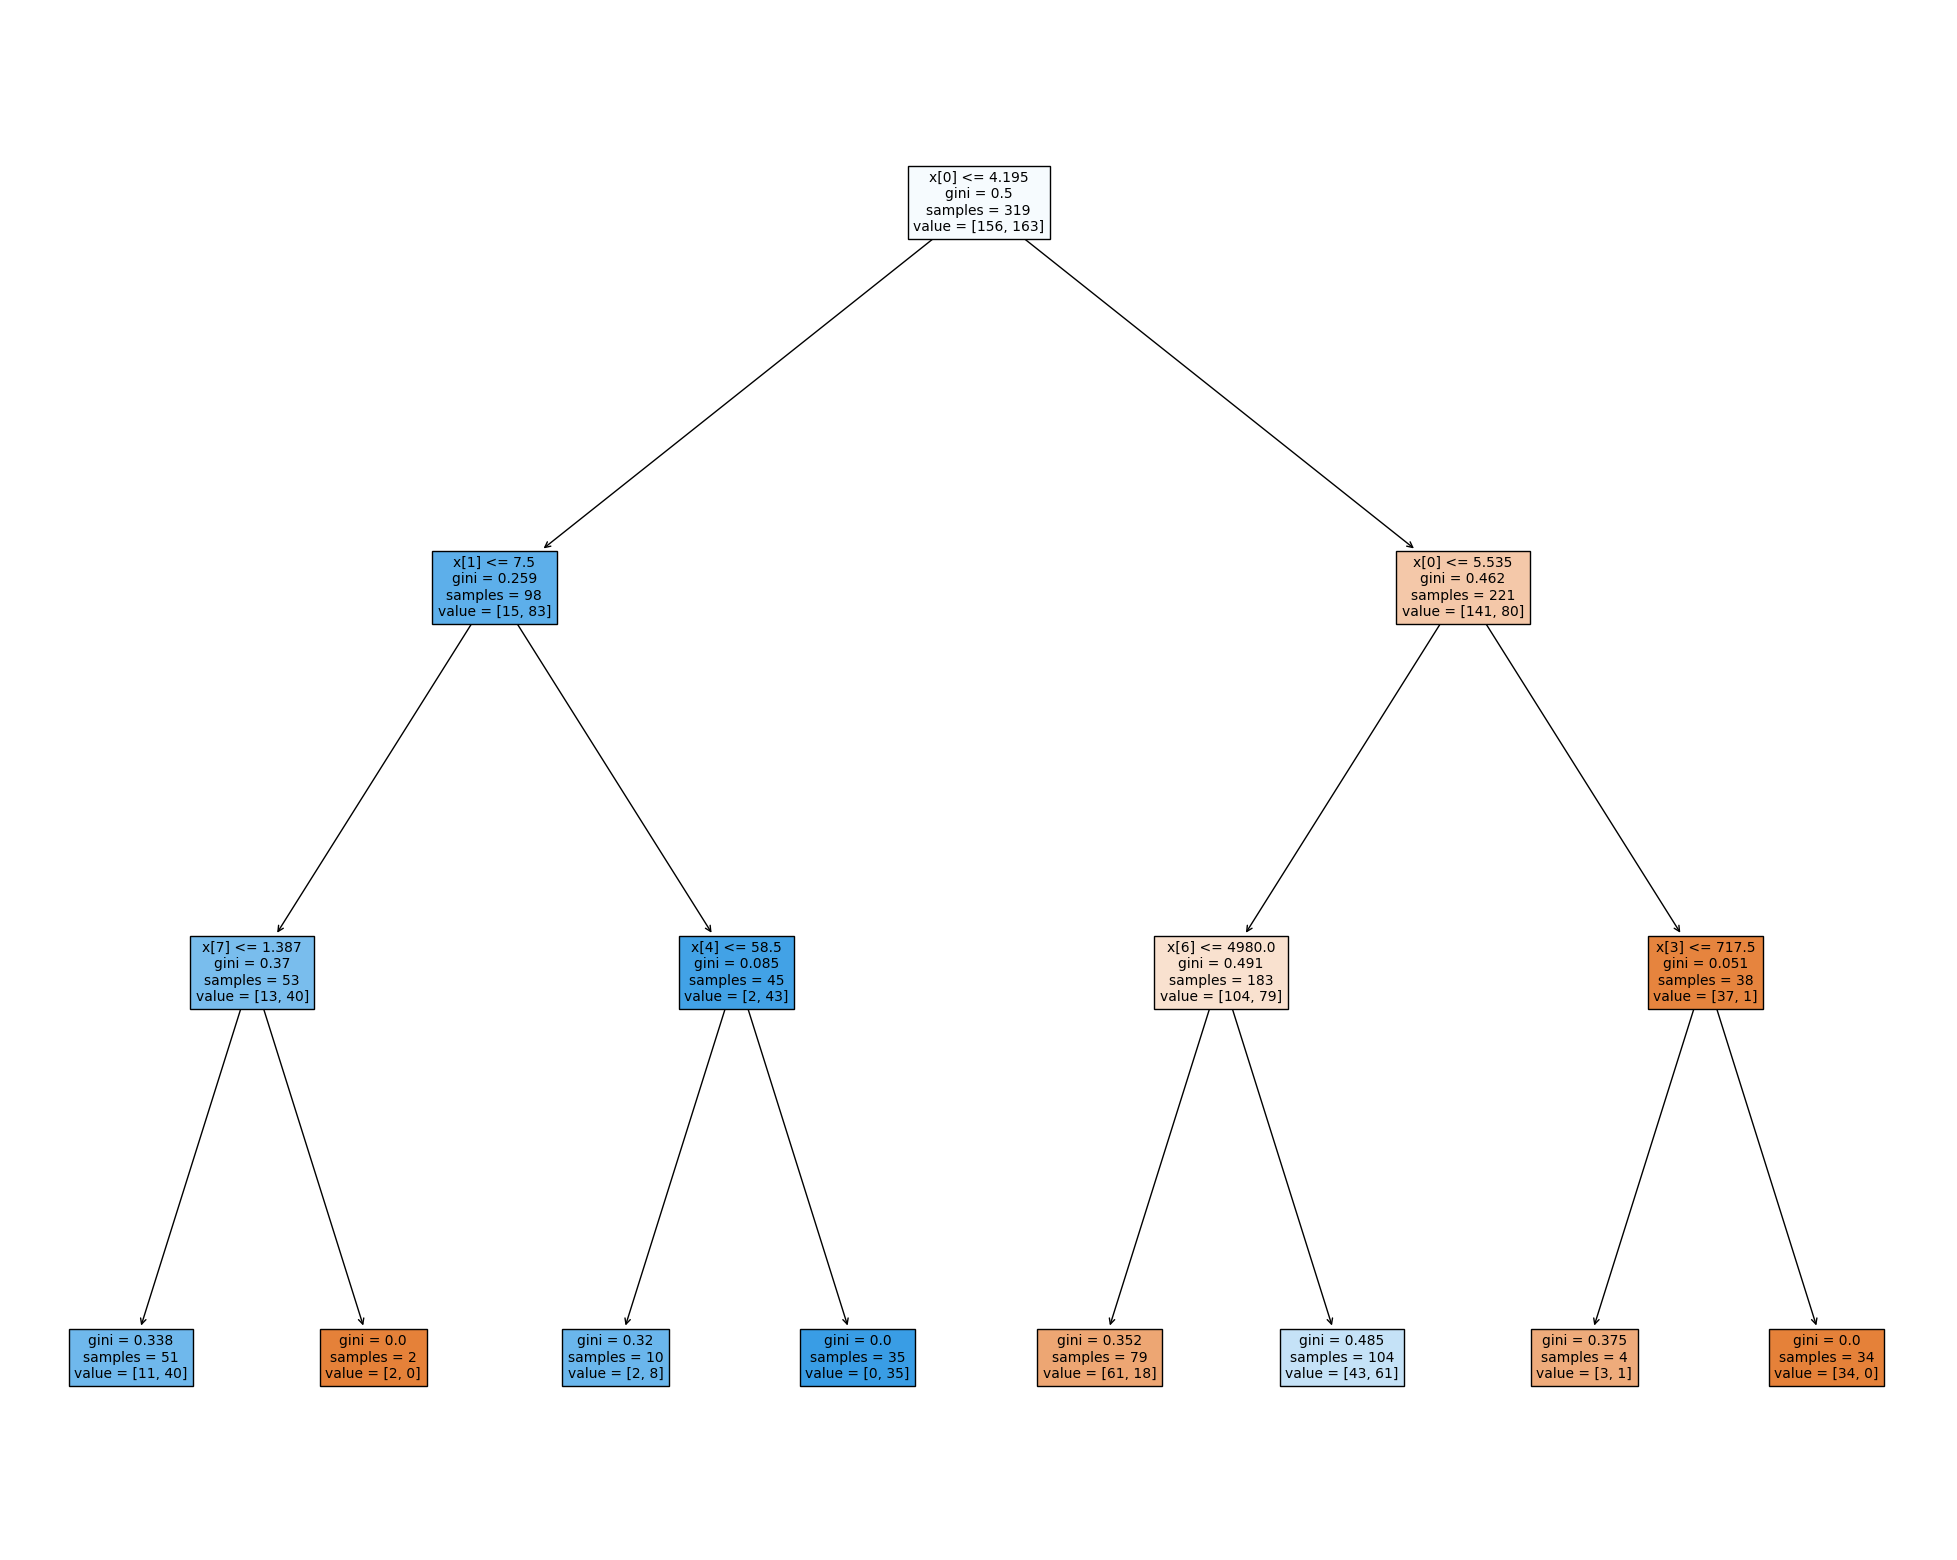

In [ ]:
# In[13]:


from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 4,
 'bootstrap': True}

forest = DecisionTreeClassifier(max_depth=3  , min_samples_split = 10, min_samples_leaf = 1, random_state=42)
model = forest.fit(X, y)
fig = plt.figure(figsize=(25,20))
tree.plot_tree(forest, filled = True, fontsize = 10)
fig.savefig("C:\\check\\decision_treeForest.png")